<h4 style="font-style: italic;">"Creativity is intelligence having fun" - Albert Einstein</h4>

**Author:** Lucas Nastari ([Linkedin](https://www.linkedin.com/in/lucas-ziza/))

<p style="font-size:15px; text-align: justify;"> AI solutions are not just about automation, they are about transformation. They hold the promise of unlocking efficiencies, insights, and opportunities across industries and sectors. Today, we will take the first step and learn how to learn and teach Python to a Gemma model. </p>

# Installing Gemma

<p style="font-size:15px; text-align: justify;">Gemma is a family of lightweight, state-of-the-art open models developed by Google DeepMind and Google. It comes in two sizes: Gemma 2B and Gemma 7B, with pre-trained and instruction-tuned variants. Gemma includes a Responsible Generative AI Toolkit for creating safer AI applications and is compatible with major frameworks like JAX, PyTorch, and TensorFlow. To get started with Gemma we need to install the Keras and KerasNLP dependencies </p>

In [1]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


<p style="font-size:15px; text-align: justify;">Don't forget to import the installed packages</p>

In [2]:
import keras
import keras_nlp

2024-03-16 18:40:20.302353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 18:40:20.302460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 18:40:20.433104: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<p style="font-size:15px; text-align: justify;">In this tutorial, we will define our backend framework as JAX </p>

In [3]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".

<p style="font-size:15px; text-align: justify;">It's time to dive in.</p>

In [4]:
%%time

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")

Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


CPU times: user 10.6 s, sys: 13.7 s, total: 24.3 s
Wall time: 1min


# LoRA Fine-Tuning

LoRA (Low Rank Adaptation) is a parameter-efficient fine-tuning technique for large language models (LLMs) that has gained popularity due to its effectiveness in addressing text-related challenges. Unlike full fine-tuning, which involves optimizing or training all layers of the neural network, LoRA focuses on fine-tuning only two smaller matrices that approximate the larger weight matrix of the pre-trained LLM.

In [5]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=4)
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,507,536,384 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,507,536,384 (9.34 GB)

 Trainable params: 1,363,968 (5.20 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

# Let's prepare our Stackoverflow dataset

<p style="font-size:15px; text-align: justify;">Stack Overflow is a popular online platform where developers can ask questions, share knowledge, and collaborate on coding-related topics.</p>

In [6]:
import pandas as pd
#Adjust dataframe view
pd.set_option('display.max_colwidth', 256)

# Reading our available data from Stackoverflow 
BASE_PATH = '/kaggle/input/pythonquestions'
df_answers = pd.read_csv(f'{BASE_PATH}/Answers.csv', encoding = "ISO-8859-1")
df_questions = pd.read_csv(f'{BASE_PATH}/Questions.csv', encoding = "ISO-8859-1") 

In [7]:
#Take a look in some answers
df_answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilities-&gt;Terminal) and type this in:</p>\r\n\r\n<pre><code>locate InsertFontHere<br></code></pre>\r\n\r\n<p>This will spit out every file that has the name you want.</p>\r\n\r\n<p>Warning: there may be alot ...
1,518,153.0,2008-08-02T17:42:28Z,469,2,"<p>I haven't been able to find anything that does this directly. I think you'll have to iterate through the various font folders on the system: <code>/System/Library/Fonts</code>, <code>/Library/Fonts</code>, and there can probably be a user-level dir..."
2,536,161.0,2008-08-02T18:49:07Z,502,9,"<p>You can use ImageMagick's convert utility for this, see some examples in <a href=""https://web.archive.org/web/20120413111338/http://studio.imagemagick.org/pipermail/magick-users/2002-May/002636.html"" rel=""nofollow"">http://studio.imagemagick.org/pipe..."
3,538,156.0,2008-08-02T18:56:56Z,535,23,"<p>One possibility is Hudson. It's written in Java, but there's integration with Python projects:</p>\n\n<blockquote>\n <p><a href=""http://redsolo.blogspot.com/2007/11/hudson-embraces-python.html"" rel=""nofollow"">Hudson embraces Python</a></p>\n</bloc..."
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">Buildbot - Trac</a> at work, I haven't used it too much since my code base isn't part of the release cycle yet. But we run the tests on different environments (OSX/Linux/Win) and it sends emails --and it's w..."


How much data we are talking about?

In [8]:
#Let's see
print(f'Questions:{len(df_questions)}\nAnswers:{len(df_answers)}')

Questions:607282
Answers:987122


<p style="font-size:28px">😱😱</p> <p style="font-size:15px">We need to explore the data and add some filters to work with only the right answers and questions</p>

## Adding statistics to our code

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


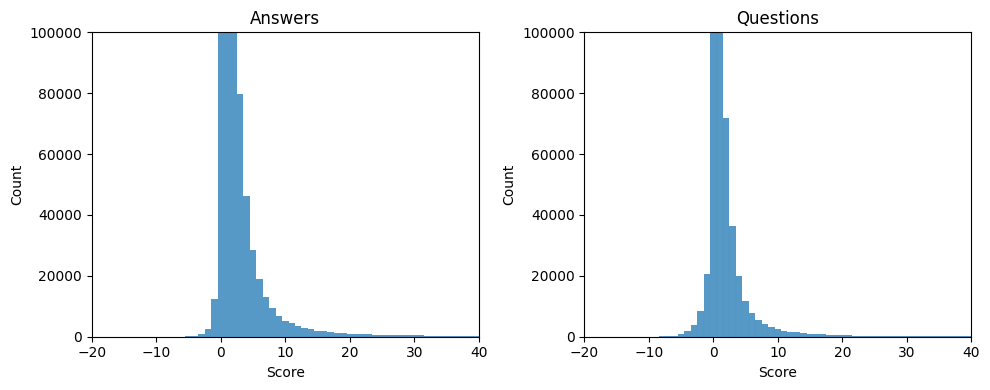

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the histogram for the first DataFrame
sns.histplot(data=df_answers, x='Score', bins=range(-50, 100), discrete=True, ax=axs[0])
axs[0].set_title('Answers')

# Plotting the histogram for the second DataFrame
sns.histplot(data=df_questions, x='Score', bins=range(-50, 100), discrete=True, ax=axs[1])
axs[1].set_title('Questions')

for ax in axs:
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_xlim(-20, 40)
    ax.set_ylim(0, 100000)

# Adjusting the layout and displaying the subplot
plt.tight_layout()
plt.show()

In [11]:
def filter_by_std(dataframe, threshold=1):
    # Calculate standard deviation
    std_dev = dataframe['Score'].std()
    
    # Filter rows based on standard deviation
    filtered_data = dataframe[dataframe['Score'] > (threshold * std_dev)]
    
    return filtered_data

We can use the standard deviation to extract only the best questions and aswers from our dataset
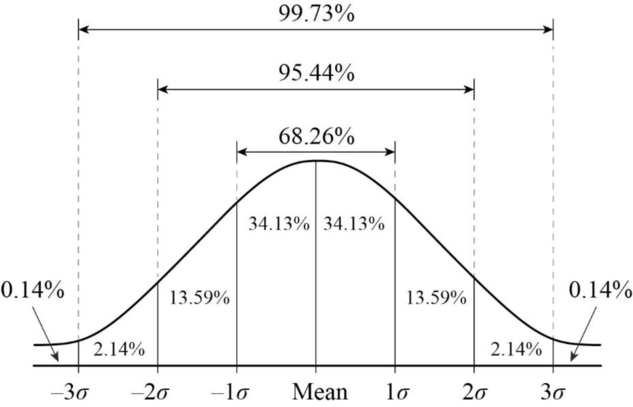

In [12]:
# Let's use the best 2.28% (2.14 + 0.14) of our datasets
df_questions = filter_by_std(df_questions, threshold=2)
df_answers = filter_by_std(df_answers, threshold=2)

In [13]:
print(f'Questions:{len(df_questions)}\nAnswers:{len(df_answers)}')

Questions:3815
Answers:7150


In [14]:
# Merge the dataframes of the questions with the answers
qa = df_questions.merge(df_answers,left_on = 'Id', right_on = 'ParentId')

# Rename and filter the interest columns
qa = qa.rename(columns={
    'Title': 'Question',
    'Body_y': 'Answer',
})[['Question', 'Answer']]

# Prepare my data
data = []
for index, row in qa.iterrows():
    data.append(f"Question:\n{row['Question']}\n\nAnswer:\n{row['Answer']}")

# Fitting our data into the Gemma

In [15]:
# Limit the input sequence length to 128 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 128
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

gemma_lm.fit(data, epochs=1, batch_size=1)

I0000 00:00:1710614647.257359     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710614647.330433     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5228/5228 ━━━━━━━━━━━━━━━━━━━━ 2194s 409ms/step - loss: 1.4670 - sparse_categorical_accuracy: 0.6546


# Preparing our prompt

In [16]:
def ask_question(query:str)->str:
    template = "Question:\n{question}\n\nAnswer:\n{answer}"
    prompt = template.format(
        question=query,
        answer="",
    )
    return prompt

sampler = keras_nlp.samplers.TopKSampler(k=5, seed=2)
gemma_lm.compile(sampler=sampler)

# 🤩 Ask something

In [17]:
prompt = ask_question("How to create a class in Python?")
print(gemma_lm.generate(prompt, max_length=512))

W0000 00:00:1710616816.412888      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710616816.944453      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Question:
How to create a class in Python?

Answer:
<p>You can also use <code>__new__</code> for more control over the class creation process.  The <code>__new__</code> method is a special method that is called when a class is first referenced (for example, <code>MyClass()</code>), or when a class is created (for example, <code>MyClass(args)</code>).  The first time you reference a class, the interpreter will call <code>__new__</code>.  The <code>__new__</code> method can be used to create an instance of the class.  The <code>__new__</code> method should return an object that will be the new instance of the class, or <code>None</code> if you want the interpreter to create a new instance of the class instead.</p>

<p>For example:</p>

<pre><code>class MyClass():
    def __new__(cls, *args, **kwargs):
        print "Creating new instance."
        # Do some work.  This might be expensive or take time to compute.



In [18]:
prompt = ask_question("How to work with data structure in Python?")
print(gemma_lm.generate(prompt, max_length=512))

Question:
How to work with data structure in Python?

Answer:
<p>There are many different approaches to data structures in Python. Here is a quick list:</p>

<ul>
<li><p>Lists</p>  
  <code>a=[1,2,3,4]</code></li>

